<a href="https://colab.research.google.com/github/shubh9956/M_L_Practice_projects/blob/main/2_Fraudental%20Transactions/2_Handling_Class_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let’s say we have a dataset of credit card companies where we have to find out whether the credit card transaction was fraudulent or not.

**But here’s the catch… the fraud transaction is relatively rare, only 6% of the transaction is fraudulent.**









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Upload_to_Github/2_data/creditcard.csv')

In [4]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [5]:
data['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


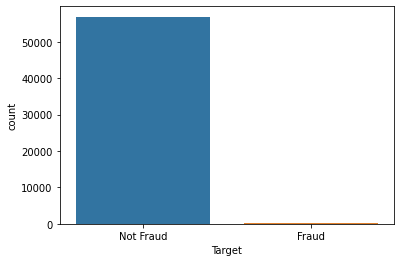

In [6]:
# visualize the target variable
g = sns.countplot(data['Target'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

## The Metric Trap

One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

Let’s do this experiment, using simple XGBClassifier and no feature engineering:

In [7]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [9]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45492
1       77
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11372
1       21
Name: Target, dtype: int64


In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
accuracy_score(y_pred, Y_test)

0.9987711752830686

In [13]:
confusion_matrix(y_pred, Y_test)

array([[11371,    13],
       [    1,     8]])

In [14]:
roc_auc_score(y_pred, Y_test)

0.9438734676348871

##Resampling Techniques

There are two resampling techniques:

**Under sampling**

**Over Sampling**

In [15]:
data['Target'].value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [16]:


# Separate class
class_0 = data[data['Target'] == 0]
class_1 = data[data['Target'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (56864, 30)
class 1: (98, 30)


# 1. Random Under-Sampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [17]:
class_0_under = class_0.sample(n=98)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [18]:
test_under['Target'].value_counts()

0    98
1    98
Name: Target, dtype: int64

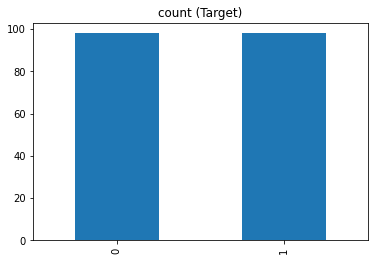

In [19]:
test_under['Target'].value_counts().plot(kind='bar', title='count (Target)')

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(random_state=42, replacement=True)
#x_rus, y_rus = rus.fit_resample(data.iloc[:,0:-1], data['Target'])

#print('Original dataset shape:', len(data))
#print('Resampled dataset shape', len(y_rus))

# 2. Random Over-Sampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

In [20]:
class_1_over = class_1.sample(56864, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [21]:
test_over['Target'].value_counts()

1    56864
0    56864
Name: Target, dtype: int64

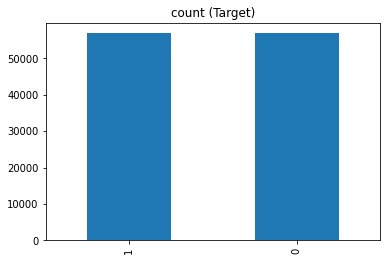

In [22]:
test_over['Target'].value_counts().plot(kind='bar', title='count (Target)')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_ros))

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(ratio='majority')

X_tl, y_tl = tl.fit_sample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape:', len(data))
print('Resampled dataset shape', len(y_tl))

**Using SMOTE concept**

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Target'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 56962
Resampled dataset shape 113728


# 5. Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM.

During training, we can use the argument `class_weight=’balanced’` to penalize mistakes on the minority class by an amount proportional to how under-represented it is.


In [23]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.9218443796794131
Accuracy score: 0.986307381725621


# 6. Trying Tree Based Algorithms



In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, Y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

print('ROCAUC score:', roc_auc_score(Y_test, xgb_y_predict))
print('Accuracy score:', accuracy_score(Y_test, xgb_y_predict))

ROCAUC score: 0.8808204780329296
Accuracy score: 0.9992978144474678


# USING SMOTE + Deep Neural Network to solve this!

In [26]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 3)

In [27]:
# DNN
from tensorflow import keras

def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=[X_train.shape[-1]]),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [28]:
# DNN (fit and validation)
import tensorflow as tf

batch_size = 512
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

model = get_model()
fit = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
178/178 [==============================] - 6s 29ms/step - loss: 0.3453 - accuracy: 0.8943 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 2/20
178/178 [==============================] - 6s 32ms/step - loss: 0.0730 - accuracy: 0.9780 - val_loss: 0.0247 - val_accuracy: 0.9918
Epoch 3/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0563 - accuracy: 0.9806 - val_loss: 0.0358 - val_accuracy: 0.9943
Epoch 4/20
178/178 [==============================] - 5s 27ms/step - loss: 0.0360 - accuracy: 0.9873 - val_loss: 0.0237 - val_accuracy: 0.9923
Epoch 5/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0287 - val_accuracy: 0.9893
Epoch 6/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0273 - accuracy: 0.9903 - val_loss: 0.0152 - val_accuracy: 0.9970
Epoch 7/20
178/178 [==============================] - 3s 19ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 0.0311 - val_accuracy: 0.9930

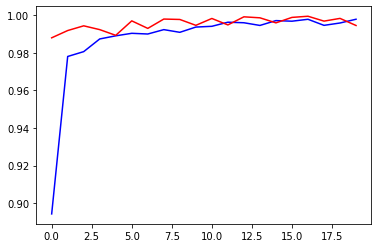

In [29]:
import matplotlib.pyplot as plt

plt.plot(fit.history['accuracy'], color='blue')
plt.plot(fit.history['val_accuracy'], color='red')
plt.show()